# Spatial data structures and algorithms (`scipy.spatial`)

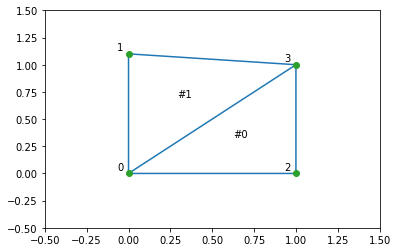

In [4]:
from scipy.spatial import Delaunay
import numpy as np
import matplotlib.pyplot as plt

points = np.array([[0, 0], [0, 1.1], [1, 0], [1, 1]])
tri = Delaunay(points)
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
for j, p in enumerate(points):
    plt.text(p[0]-0.03, p[1]+0.03, j, ha='right') # label the points
for j, s in enumerate(tri.simplices):
    p = points[s].mean(axis=0)
    plt.text(p[0], p[1], '#%d' % j, ha='center') # label triangles
plt.xlim(-0.5, 1.5); plt.ylim(-0.5, 1.5)
plt.show()

In [7]:
i = 1
tri.simplices[i,:]
points[tri.simplices[i,:]]

array([[1. , 1. ],
       [0. , 1.1],
       [0. , 0. ]])

In [8]:
tri.neighbors[i]

array([-1,  0, -1], dtype=int32)

In [9]:
points[tri.simplices[i, 1]]

array([0. , 1.1])

In [10]:
points = np.array([[0, 0], [0, 1], [1, 0], [1, 1], [1, 1]])
tri = Delaunay(points)
np.unique(tri.simplices.ravel())

array([0, 1, 2, 3], dtype=int32)

In [11]:
tri.coplanar

array([[4, 0, 3]], dtype=int32)

In [12]:
tri = Delaunay(points, qhull_options="QJ Pp")
points[tri.simplices]

array([[[1, 0],
        [1, 1],
        [0, 0]],

       [[1, 1],
        [1, 1],
        [1, 0]],

       [[1, 1],
        [0, 1],
        [0, 0]],

       [[0, 1],
        [1, 1],
        [1, 1]]])

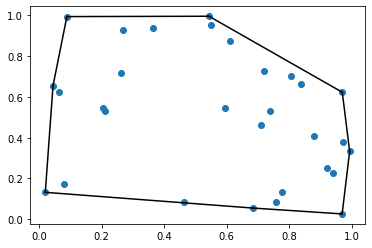

In [14]:
from scipy.spatial import ConvexHull
points = np.random.rand(30, 2)   # 30 random points in 2-D
hull = ConvexHull(points)
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex,0], points[simplex,1], 'k-')
plt.show()

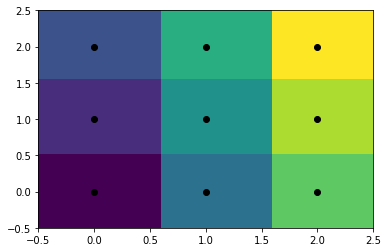

In [15]:
from scipy.spatial import KDTree
points = np.array([[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2],
                   [2, 0], [2, 1], [2, 2]])
tree = KDTree(points)
tree.query([0.1, 0.1])
x = np.linspace(-0.5, 2.5, 31)
y = np.linspace(-0.5, 2.5, 33)
xx, yy = np.meshgrid(x, y)
xy = np.c_[xx.ravel(), yy.ravel()]
import matplotlib.pyplot as plt
plt.pcolor(x, y, tree.query(xy)[1].reshape(33, 31))
plt.plot(points[:,0], points[:,1], 'ko')
plt.show()

In [16]:
from scipy.spatial import Voronoi
vor = Voronoi(points)
vor.vertices

array([[0.5, 0.5],
       [0.5, 1.5],
       [1.5, 0.5],
       [1.5, 1.5]])

In [17]:
vor.regions

[[],
 [-1, 0],
 [-1, 1],
 [1, -1, 0],
 [3, -1, 2],
 [-1, 3],
 [-1, 2],
 [0, 1, 3, 2],
 [2, -1, 0],
 [3, -1, 1]]

In [18]:
vor.ridge_vertices

[[-1, 0],
 [-1, 0],
 [-1, 1],
 [-1, 1],
 [0, 1],
 [-1, 3],
 [-1, 2],
 [2, 3],
 [-1, 3],
 [-1, 2],
 [1, 3],
 [0, 2]]

In [19]:
vor.ridge_points

array([[0, 3],
       [0, 1],
       [2, 5],
       [2, 1],
       [1, 4],
       [7, 8],
       [7, 6],
       [7, 4],
       [8, 5],
       [6, 3],
       [4, 5],
       [4, 3]], dtype=int32)

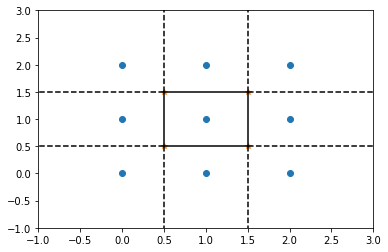

In [20]:
plt.plot(points[:, 0], points[:, 1], 'o')
plt.plot(vor.vertices[:, 0], vor.vertices[:, 1], '*')
plt.xlim(-1, 3); plt.ylim(-1, 3)

for simplex in vor.ridge_vertices:
    simplex = np.asarray(simplex)
    if np.all(simplex >= 0):
        plt.plot(vor.vertices[simplex, 0], vor.vertices[simplex, 1], 'k-')
        
center = points.mean(axis=0)
for pointidx, simplex in zip(vor.ridge_points, vor.ridge_vertices):
    simplex = np.asarray(simplex)
    if np.any(simplex < 0):
        i = simplex[simplex >= 0][0] # finite end Voronoi vertex
        t = points[pointidx[1]] - points[pointidx[0]]  # tangent
        t = t / np.linalg.norm(t)
        n = np.array([-t[1], t[0]]) # normal
        midpoint = points[pointidx].mean(axis=0)
        far_point = vor.vertices[i] + np.sign(np.dot(midpoint - center, n)) * n * 100
        plt.plot([vor.vertices[i,0], far_point[0]],
                 [vor.vertices[i,1], far_point[1]], 'k--')
plt.show()

In [21]:
from scipy import spatial

def mandala(n_iter, n_points, radius):
    """Creates a mandala figure using Voronoi tesselations.

    Parameters
    ----------
    n_iter : int
        Number of iterations, i.e. how many times the equidistant points will
        be generated.
    n_points : int
        Number of points to draw per iteration.
    radius : scalar
        The radial expansion factor.

    Returns
    -------
    fig : matplotlib.Figure instance

    Notes
    -----
    This code is adapted from the work of Audrey Roy Greenfeld [1]_ and Carlos
    Focil-Espinosa [2]_, who created beautiful mandalas with Python code.  That
    code in turn was based on Antonio Sánchez Chinchón's R code [3]_.

    References
    ----------
    .. [1] https://www.codemakesmehappy.com/2019/09/voronoi-mandalas.html

    .. [2] https://github.com/CarlosFocil/mandalapy

    .. [3] https://github.com/aschinchon/mandalas

    """
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    ax.set_axis_off()
    ax.set_aspect('equal', adjustable='box')

    angles = np.linspace(0, 2*np.pi * (1 - 1/n_points), num=n_points) + np.pi/2
    # Starting from a single center point, add points iteratively
    xy = np.array([[0, 0]])
    for k in range(n_iter):
        t1 = np.array([])
        t2 = np.array([])
        # Add `n_points` new points around each existing point in this iteration
        for i in range(xy.shape[0]):
            t1 = np.append(t1, xy[i, 0] + radius**k * np.cos(angles))
            t2 = np.append(t2, xy[i, 1] + radius**k * np.sin(angles))

        xy = np.column_stack((t1, t2))

    # Create the Mandala figure via a Voronoi plot
    spatial.voronoi_plot_2d(spatial.Voronoi(xy), ax=ax)

    return fig

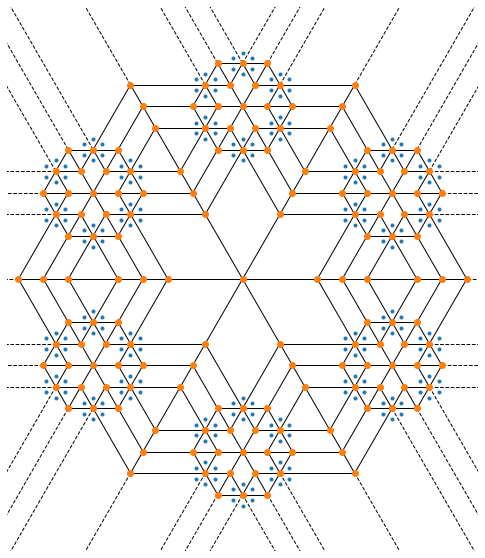

In [22]:
# Modify the following parameters in order to get different figures
n_iter = 3
n_points = 6
radius = 4
fig = mandala(n_iter, n_points, radius)
plt.show()